<a href="https://colab.research.google.com/github/nroe413/Search-and-Rescue-in-DuckieTown/blob/main/training_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio
!pip install opencv-python-headless  # 'opencv-python-headless' avoids unnecessary GUI dependencies
!pip install matplotlib  # For plotting
!pip install ultralytics

In [7]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, confirm that the image file exists


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using cuda device


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-23 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Processed and saved: detected_image_20240422_223504_107608.jpg


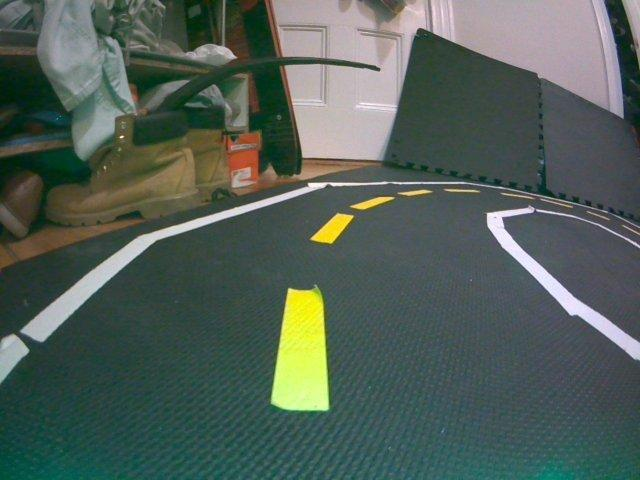

Processed and saved: detected_image_20240422_223732_650931.jpg


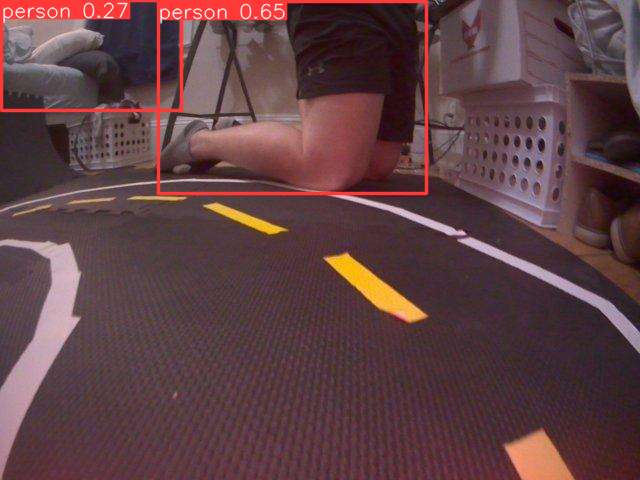

Processed and saved: detected_image_20240422_223730_518762.jpg


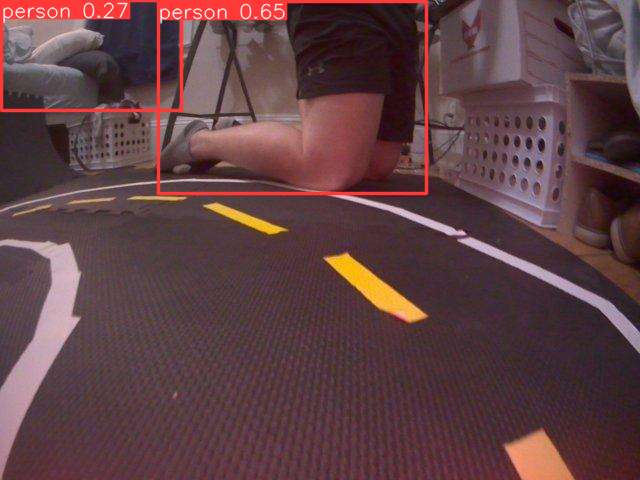

Processed and saved: detected_image_20240422_224308_348125.jpg


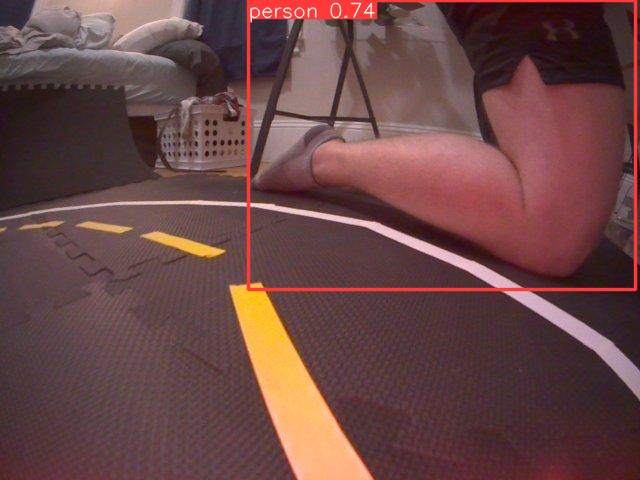

Processed and saved: detected_image_20240422_223728_425253.jpg


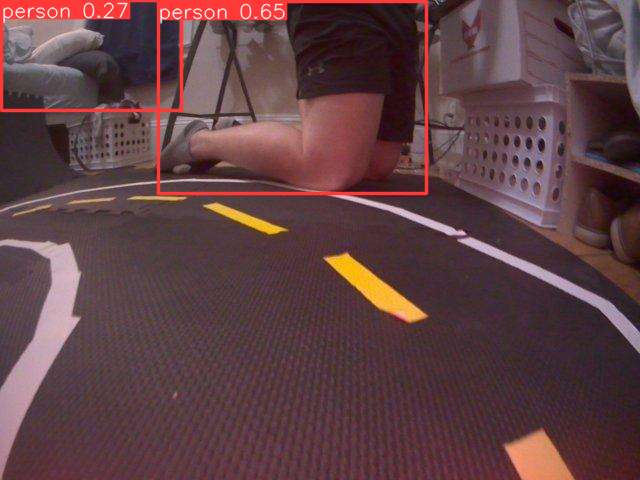

Processed and saved: detected_image_20240422_223731_586524.jpg


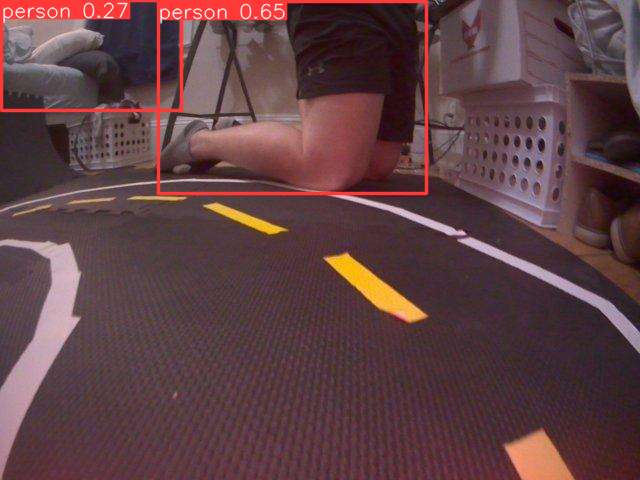

Processed and saved: detected_image_20240422_224357_661546.jpg


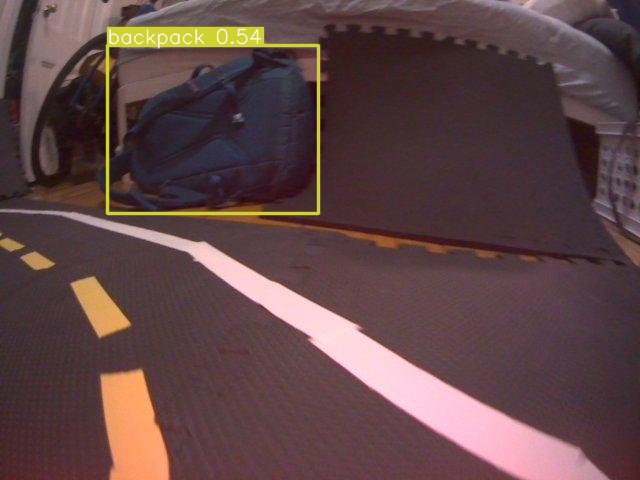

Processed and saved: detected_image_20240422_225256_118749.jpg


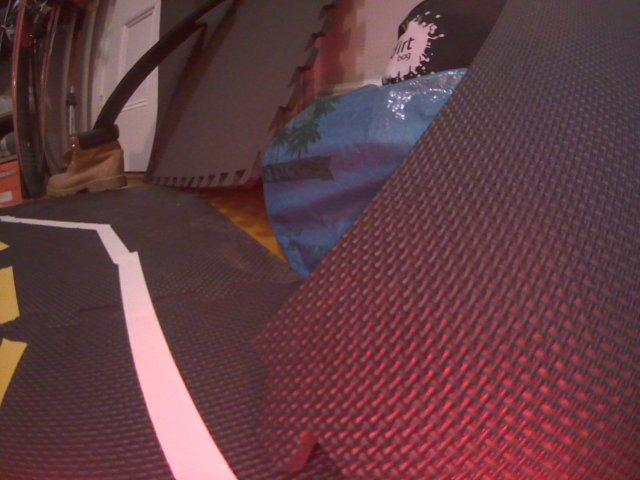

Processed and saved: detected_image_20240422_225559_916986.jpg


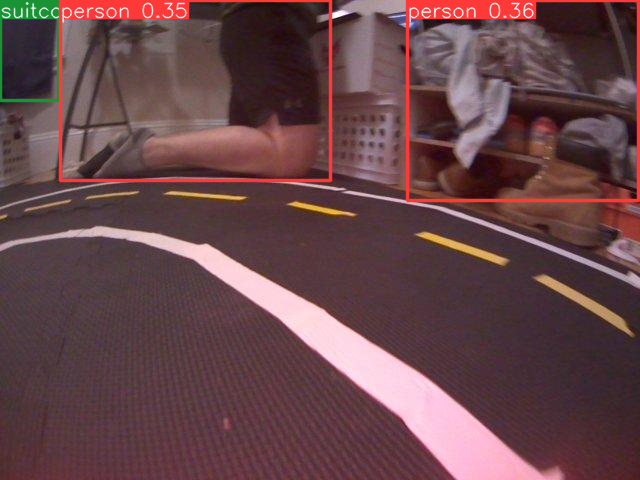

Processed and saved: detected_image_20240422_225628_218927.jpg


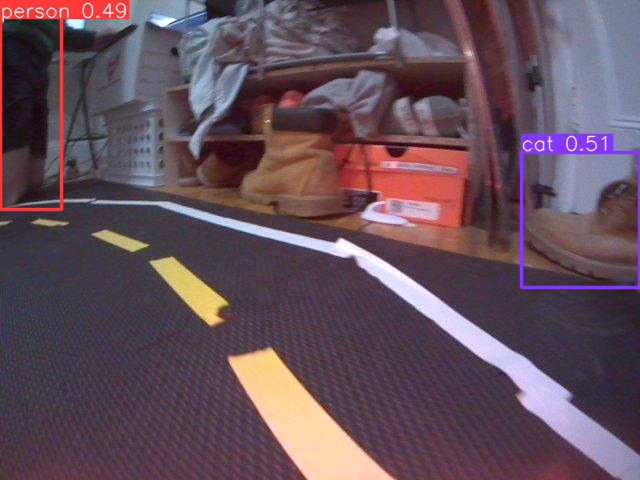

Processed and saved: detected_image_20240422_225611_453491.jpg


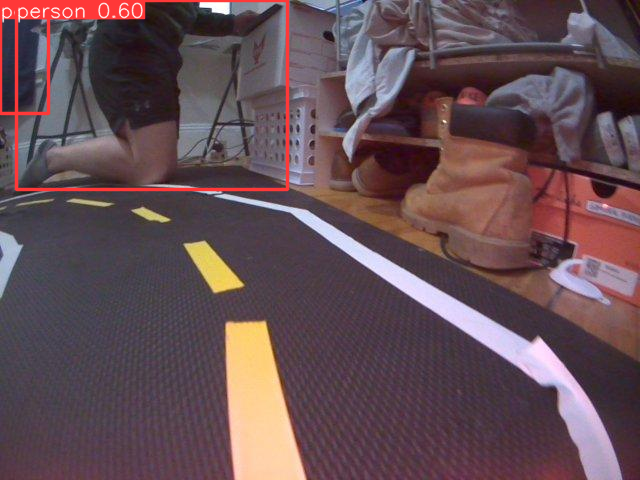

In [11]:
import cv2
import torch
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Ensure CUDA (GPU support) is available if possible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")

# Load the YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).to(device)
model.eval()

# Path to the directory containing images
directory_path = '/content/drive/MyDrive/Colab_Notebooks/uploaded_imgs'
directory_detected_image_path = '/content/drive/MyDrive/Colab_Notebooks/detected_imgs'
# List all image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Process each image
for filename in image_files:
    img_path = os.path.join(directory_path, filename)

    # Load an image using OpenCV
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format

    # Perform inference
    results = model(img_rgb)

    # Convert results to numpy array for OpenCV compatibility and make a copy for drawing
    output_image = np.squeeze(results.render()[0])

    # Save images using OpenCV
    save_path = os.path.join(directory_detected_image_path, f"detected_{filename}")
    cv2.imwrite(save_path, cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))

    # Display the saved image results (optional)
    print(f'Processed and saved: detected_{filename}')
    cv2_imshow(cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))
    cv2.waitKey(100) # Small delay to display images, adjust as needed

# Clean up display windows
cv2.destroyAllWindows()